In [97]:
import skimage, skimage.io, skimage.feature
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  cluster

In [67]:
all_descs = np.empty((0,200))
row_list = []
last_nb_row=0
for filename in os.listdir('images'):
    f = os.path.join('images', filename)
    img = skimage.io.imread(f, as_gray = True)
    descs = skimage.feature.daisy(img, step=16, radius=32, rings=3, histograms=8, orientations=8)
    descs = descs.reshape((-1, descs.shape[2]))
    row_list.append((last_nb_row, last_nb_row+descs.shape[0]))
    last_nb_row += descs.shape[0]
    all_descs = np.vstack((all_descs, descs))

In [68]:
all_descs.shape

(52712, 200)

In [98]:
clusters = cluster.KMeans(20).fit_predict(all_descs)

In [99]:
clusters[0:120]

array([ 6,  6,  6,  9, 19,  9,  6,  6,  6,  4,  4,  3,  3,  0,  0,  6,  6,
        4,  4,  3,  3,  0,  0,  0,  6,  4,  4,  6,  6,  0,  0,  0,  6,  4,
        4,  6,  6,  0,  0,  0,  4,  4,  4,  6,  6,  6,  0,  0,  4,  4,  6,
        6,  6,  6,  0,  0,  4,  6,  9,  9,  9,  6,  6,  0,  4,  6,  9,  9,
        3,  6,  6,  0,  4,  9,  4,  3,  3,  0,  6,  0,  4,  9,  4,  6,  6,
        0,  9,  0,  6,  6,  6,  6,  6,  6,  6,  6,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  5,  5,  5,  5,  5,  5,  5,
        5])

In [105]:
hist_list = []
for i in row_list:
    img_dict = {}
    bins = list(dict.fromkeys(clusters[i[0]:i[1]]))
    for j in bins:
        img_dict[j] = list(clusters[i[0]:i[1]]).count(j)
        img_dict = dict(sorted(img_dict.items()))
    hist_list.append(img_dict)

In [157]:
nphist_list = []
for i in row_list:
     nphist_list.append(np.histogram(clusters[i[0]:i[1]], bins=np.arange(21)))

In [169]:
nphist_list

[(array([21,  0, 16,  7, 19,  8, 38,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  1], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([11,  1, 36,  8,  7, 16, 71,  0,  0, 48,  0,  0,  0,  9,  0,  0,  8,
          0,  0, 10], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([13,  0,  2, 11, 22,  0, 52,  0,  2, 29,  0,  0,  0,  0,  1,  0,  0,
          0,  0,  3], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([ 4,  0, 11, 12,  7,  0, 79,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([14,  3, 14, 20,  2,  0, 85,  0,  1, 44,  0,  0,  0,  0,  0,  0,  3,
          0,  0,  9], dtype=int64),
  array([ 0,  1

In [90]:
cougar = skimage.io.imread('images/cougar.jpg', as_gray = True)

In [102]:
cougar_cluster = cluster.KMeans(20).fit_predict(cougar)

In [154]:
cougar_hist = np.histogram(cougar_cluster, bins=np.arange(21))

In [155]:
cougar_hist

(array([17,  8, 19, 10, 24, 18, 14, 26, 16, 11, 20, 15,  2,  3, 13, 11, 18,
        17, 13, 13], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]))

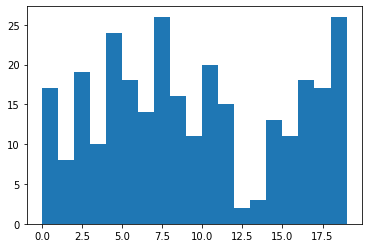

In [123]:
plt.hist(cougar_cluster, bins=np.arange(20))
plt.show()

In [124]:
print(nphist_list[3])
print(cougar_hist)

(array([ 4,  0, 11, 12,  7,  0, 79,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,
        0,  0], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]))
(array([17,  8, 19, 10, 24, 18, 14, 26, 16, 11, 20, 15,  2,  3, 13, 11, 18,
       17, 26], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]))


In [153]:
cougar_hist[1].shape

(20,)

<BarContainer object of 20 artists>

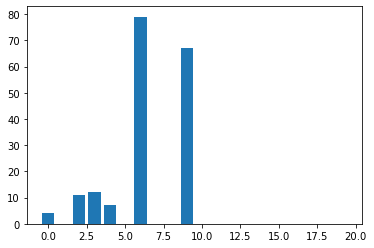

In [160]:
plt.bar(range(20), nphist_list[3][0])

<BarContainer object of 20 artists>

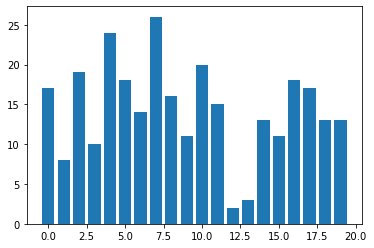

In [162]:
plt.bar(range(20), cougar_hist[0])

In [131]:
from scipy.stats import ks_2samp

kstest(nphist_list[3][0], cougar_hist[0])

KstestResult(statistic=0.6842105263157895, pvalue=0.00015621221647240893)

In [137]:
best = 0
best_ks = 0

for i in range(len(nphist_list)):
    ks = ks_2samp(nphist_list[i][0], cougar_hist[0])

    if ks[0] > best_ks:
        best = i
        best_ks = ks[0]

print(best)
print(best_ks)

102
0.8947368421052632


In [208]:
nphist_list

[(array([21,  0, 16,  7, 19,  8, 38,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  1], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([11,  1, 36,  8,  7, 16, 71,  0,  0, 48,  0,  0,  0,  9,  0,  0,  8,
          0,  0, 10], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([13,  0,  2, 11, 22,  0, 52,  0,  2, 29,  0,  0,  0,  0,  1,  0,  0,
          0,  0,  3], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([ 4,  0, 11, 12,  7,  0, 79,  0,  0, 67,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0], dtype=int64),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20])),
 (array([14,  3, 14, 20,  2,  0, 85,  0,  1, 44,  0,  0,  0,  0,  0,  0,  3,
          0,  0,  9], dtype=int64),
  array([ 0,  1

In [209]:
import operator

first_data = np.empty((0,20))

for i in nphist_list:
    first_data = np.vstack((first_data, i[0]))

print(first_data)

[[ 21.   0.  16.   7.  19.   8.  38.   0.   0.  10.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   1.]
 [ 11.   1.  36.   8.   7.  16.  71.   0.   0.  48.   0.   0.   0.   9.
    0.   0.   8.   0.   0.  10.]
 [ 13.   0.   2.  11.  22.   0.  52.   0.   2.  29.   0.   0.   0.   0.
    1.   0.   0.   0.   0.   3.]
 [  4.   0.  11.  12.   7.   0.  79.   0.   0.  67.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [ 14.   3.  14.  20.   2.   0.  85.   0.   1.  44.   0.   0.   0.   0.
    0.   0.   3.   0.   0.   9.]
 [ 19.   2.  25.  33.  18.  17.  42.   0.   4.  24.   0.   0.   0.   0.
   11.   0.   1.   0.   0.  14.]
 [ 10.  12.   8.  23.   0.   7.  26.   0.   3.   4.   0.   0.   0.   0.
    0.   0.   1.   0.   0.  11.]
 [  6.   0.  25.   7.   5.   8.  68.   0.   1.  46.   0.   0.   0.   0.
    2.   0.   0.  12.   0.   0.]
 [ 29.   0.  29.  15.  22.  14.  38.   0.   6.  19.   0.   0.   0.   0.
    6.   0.   0.   0.   0.  17.]
 [  1.   0.  14.  13.   1.   1.  85.   0.   0.  65.   0

In [214]:
first_data.shape
type(cougar_hist[0])

numpy.ndarray

In [221]:
from scipy.spatial.distance import cdist

distances = cdist(first_data, [cougar_hist[0]])

distances

array([[ 59.88321969],
       [ 87.994318  ],
       [ 71.57513535],
       [105.29007551],
       [ 98.10708435],
       [ 62.65780079],
       [ 61.39218191],
       [ 85.44003745],
       [ 58.09475019],
       [109.27030704],
       [ 56.56854249],
       [ 79.37883849],
       [ 82.86132994],
       [ 70.73895674],
       [ 58.5918083 ],
       [ 68.45436436],
       [ 93.35952014],
       [ 71.3792687 ],
       [ 68.13956266],
       [105.86311917],
       [ 71.68681887],
       [ 55.79426494],
       [ 58.43800133],
       [ 87.07468059],
       [ 78.35177088],
       [ 52.26853738],
       [ 81.85963596],
       [ 51.52669211],
       [ 66.86553671],
       [124.93998559],
       [ 60.39039659],
       [ 75.82216035],
       [ 58.403767  ],
       [ 69.02897942],
       [ 85.77878526],
       [ 56.78027827],
       [ 69.87846592],
       [ 86.40601831],
       [ 65.83312236],
       [ 56.16048433],
       [ 61.45730225],
       [ 76.72678802],
       [ 63.41135545],
       [ 81